In [80]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from RegionDeConfianza import dogleg_debug_exacto, dogleg_debug_approx, dogleg_approx, dogleg_exacto

In [81]:
def rosenbrock(x): 
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def rosenbrock_grad(x):
    return np.array([400*x[0]**3 - 400*x[0]*x[1]+2*x[0]-2, 200*(x[1] - x[0]**2)])

def rosenbrock_hess(x):
    return np.array([[1200*x[0]**2 - 400*x[1] + 2, -400*x[0]], [-400*x[0], 200]])

In [82]:
x0 = np.array([-1.2, 1.0])  
delta0 = 0.5  
max_delta = 2.0  
eta = 0.1 
max_iter = 100
tol = 1e-6

In [83]:
result = dogleg_debug_exacto(rosenbrock, rosenbrock_grad, rosenbrock_hess, x0, delta0, max_delta, eta, max_iter, tol)
x_opt, f_opt, x_k, f_k, delta_k, rho_k_list, p_k_list, p_u_list, p_b_list, p_k_tipo, iter = result

In [84]:
x_k = np.array(x_k)

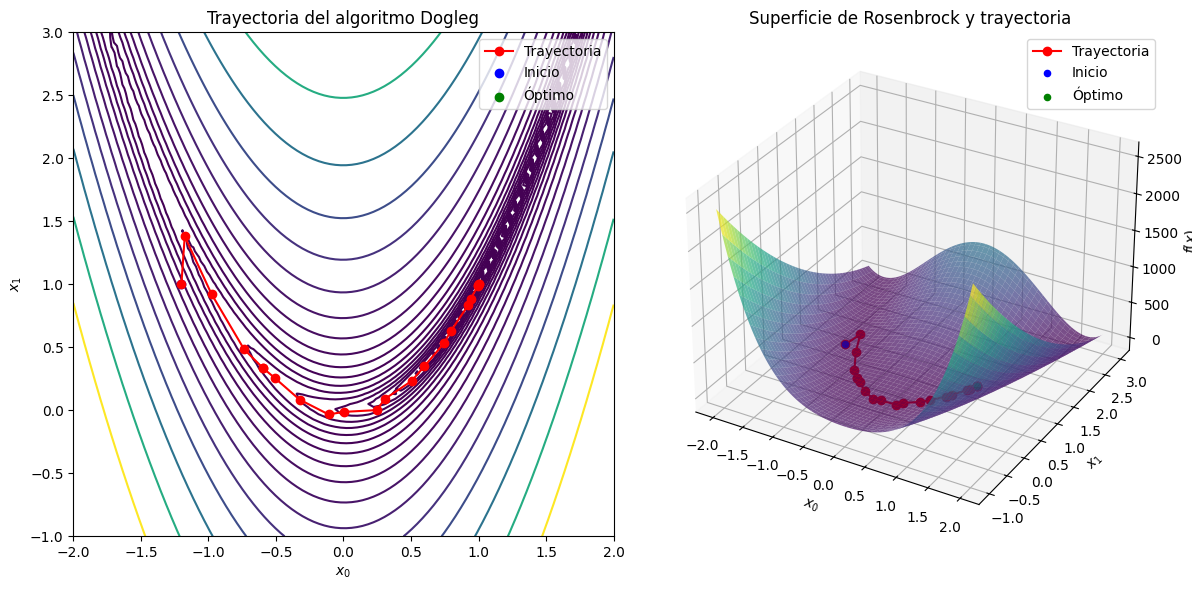

In [85]:
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 3, 100))
Z = 100 * (Y - X**2)**2 + (1 - X)**2

fig = plt.figure(figsize=(12, 6))

# Contorno 2D
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap="viridis")
plt.plot(x_k[:, 0], x_k[:, 1], 'r-o', label="Trayectoria")
plt.scatter(x0[0], x0[1], color="blue", label="Inicio")
plt.scatter(x_opt[0], x_opt[1], color="green", label="Óptimo")
plt.title("Trayectoria del algoritmo Dogleg")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend()

# Superficie 3D
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.7, cmap="viridis", edgecolor='none')
ax.plot(x_k[:, 0], x_k[:, 1], f_k, 'r-o', label="Trayectoria")
ax.scatter(x0[0], x0[1], rosenbrock(x0), color="blue", label="Inicio")
ax.scatter(x_opt[0], x_opt[1], f_opt, color="green", label="Óptimo")
ax.set_title("Superficie de Rosenbrock y trayectoria")
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.set_zlabel("$f(x)$")
ax.legend()

plt.tight_layout()
plt.show()

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juanm\AppData\Local\Temp\ipykernel_32420\1796678278.py:14: SyntaxWarning: invalid escape sequence '\d'
  circle = Circle(center, delta, color='orange', alpha=0.3, label="Radio $\delta_k$" if i == 0 else None)


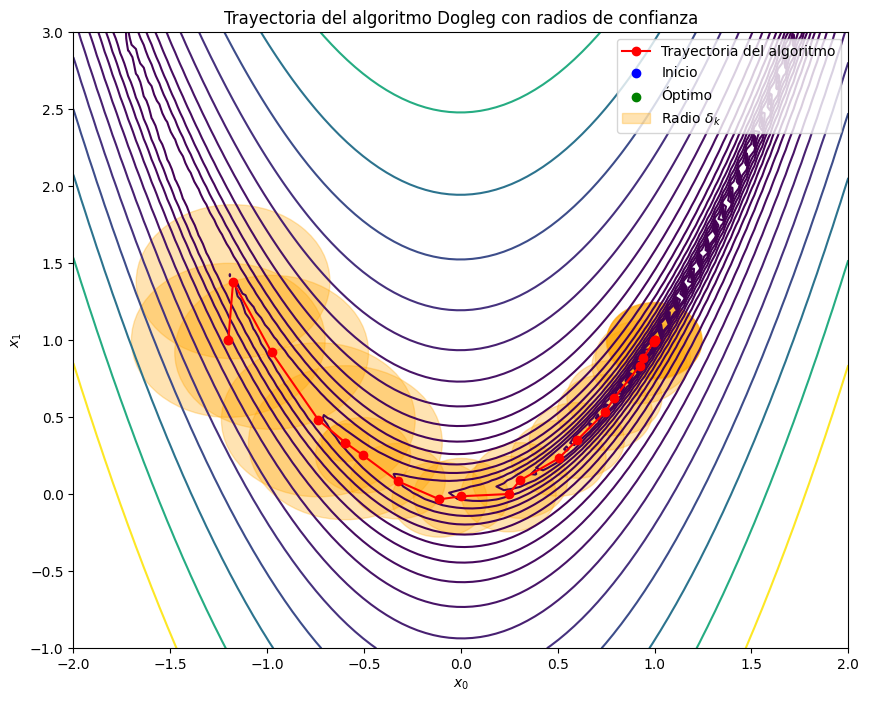

In [86]:
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-1, 3, 100))
Z = 100 * (Y - X**2)**2 + (1 - X)**2

fig, ax = plt.subplots(figsize=(10, 8))

# Contorno de la función
contour = ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap="viridis")
ax.plot(x_k[:, 0], x_k[:, 1], 'r-o', label="Trayectoria del algoritmo")
ax.scatter(x0[0], x0[1], color="blue", label="Inicio")
ax.scatter(x_opt[0], x_opt[1], color="green", label="Óptimo")

# Dibujar círculos para cada radio de confianza
for i, (center, delta) in enumerate(zip(x_k, delta_k)):
    circle = Circle(center, delta, color='orange', alpha=0.3, label="Radio $\delta_k$" if i == 0 else None)
    ax.add_patch(circle)

ax.set_title("Trayectoria del algoritmo Dogleg con radios de confianza")
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
ax.legend()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)

plt.show()


In [87]:
def visualize_dogleg_step(x_k, delta_k, p_u, p_b, p_k, f, step_index):
    """
    Visualiza un paso individual del método Dogleg.
    
    Parameters:
    - x_k: Punto actual (array de 2 elementos).
    - delta_k: Radio de confianza en el paso actual.
    - p_u: Paso de Cauchy.
    - p_b: Paso de Newton.
    - p_k: Paso elegido.
    - f: Función objetivo (para graficar contornos).
    - step_index: Índice del paso actual.
    """
    # Crear una cuadrícula para la función objetivo
    X, Y = np.meshgrid(np.linspace(-4, 4, 300), np.linspace(-4, 4, 300))
    Z = f([X, Y])

    fig, ax = plt.subplots(figsize=(8, 8))

    # Contorno de la función objetivo
    ax.contour(X, Y, Z, levels=np.logspace(-4, 4, 20), cmap="viridis")
    
    # Dibujar la región de confianza como un círculo
    trust_region = Circle(x_k, delta_k, color='orange', alpha=0.3, label="Radio $\delta_k$")
    ax.add_patch(trust_region)

    # Graficar los pasos
    ax.quiver(*x_k, *p_u, angles='xy', scale_units='xy', scale=1, color='blue', label="$p_u$ (Paso de Cauchy)")
    ax.quiver(*x_k, *p_b, angles='xy', scale_units='xy', scale=1, color='green', label="$p_b$ (Paso de Newton)")
    ax.quiver(*x_k, *p_k, angles='xy', scale_units='xy', scale=1, color='red', label="$p_k$ (Paso final)")

    # Punto actual
    ax.scatter(*x_k, color="black", label="Punto actual $x_k$")

    # Etiquetas y leyenda
    ax.set_title(f"Paso {step_index}: Elección del siguiente punto")
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    ax.legend()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

    plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juanm\AppData\Local\Temp\ipykernel_32420\3548815895.py:24: SyntaxWarning: invalid escape sequence '\d'
  trust_region = Circle(x_k, delta_k, color='orange', alpha=0.3, label="Radio $\delta_k$")


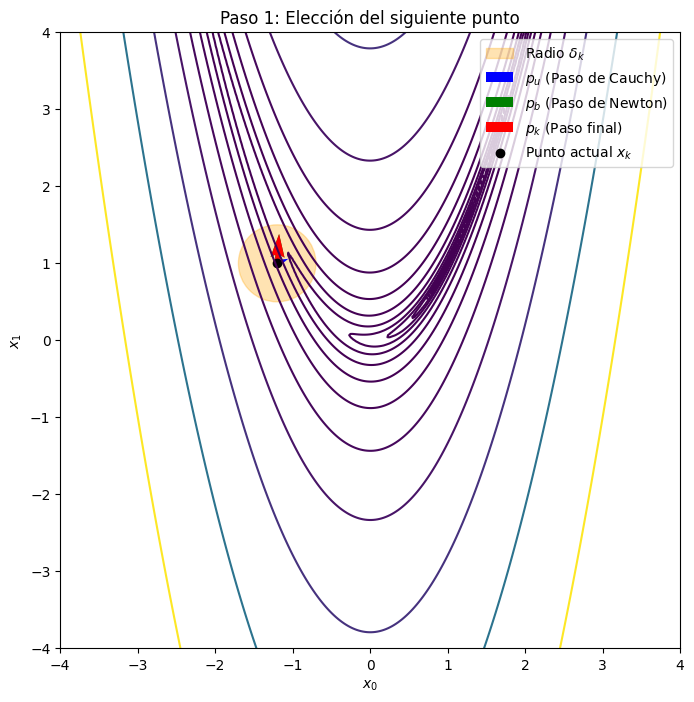

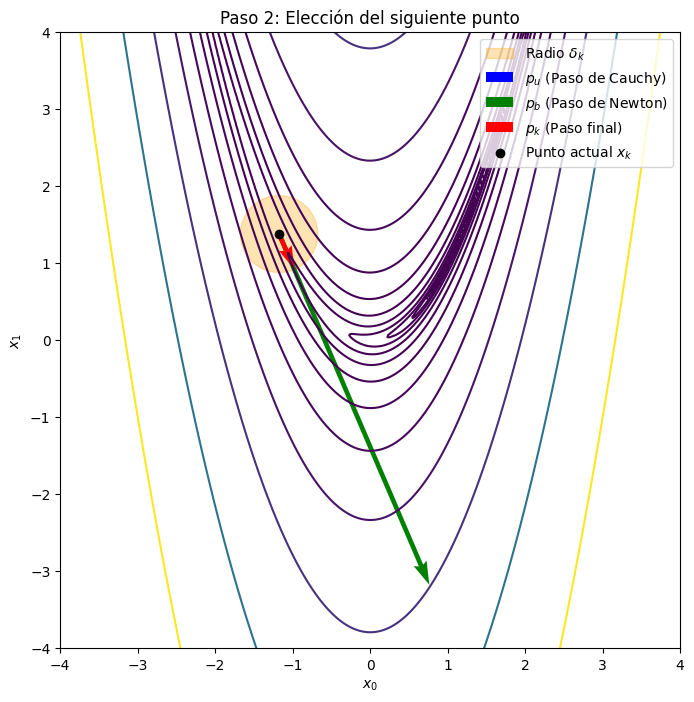

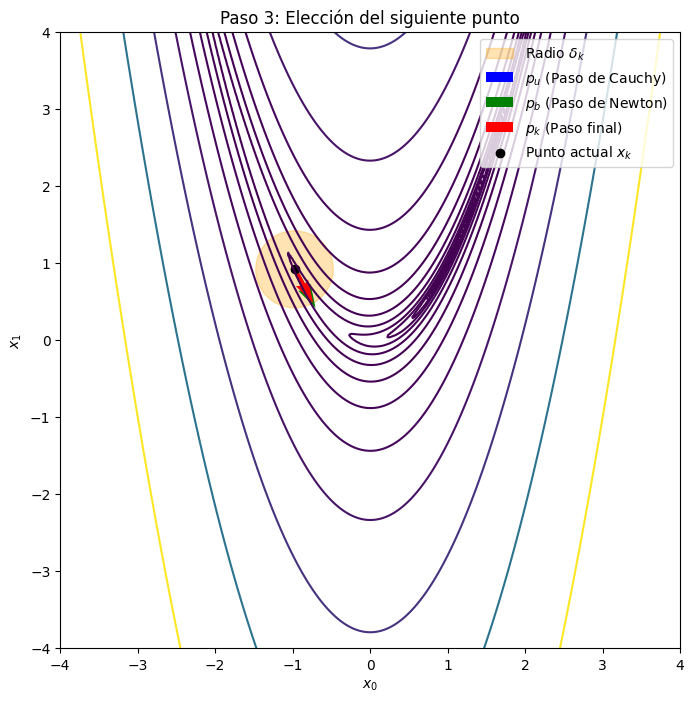

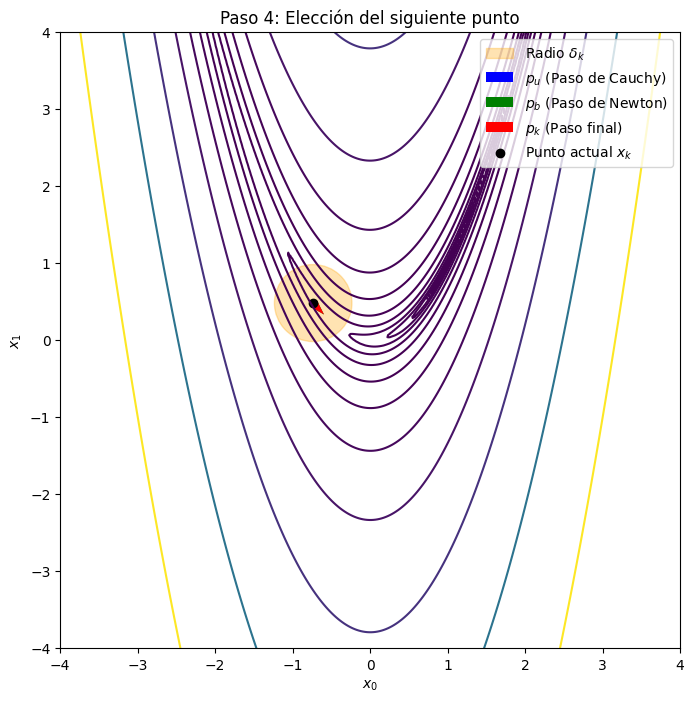

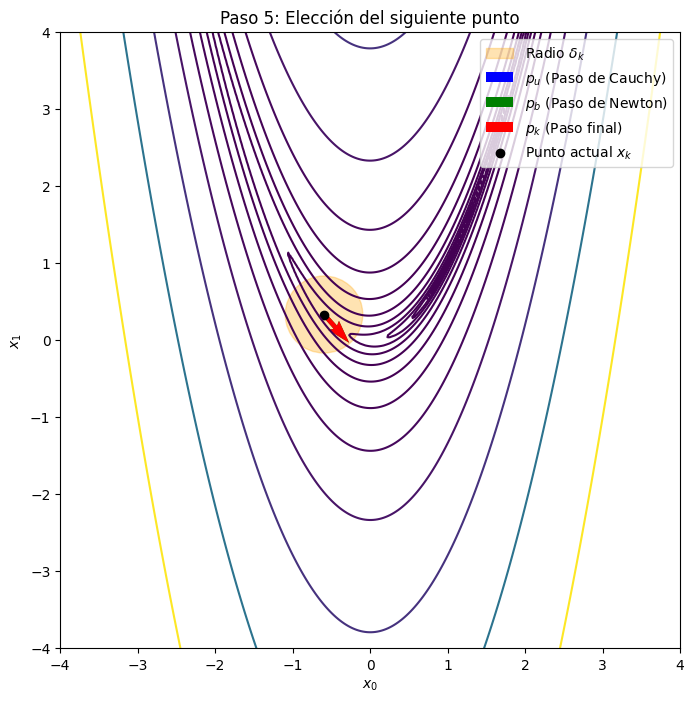

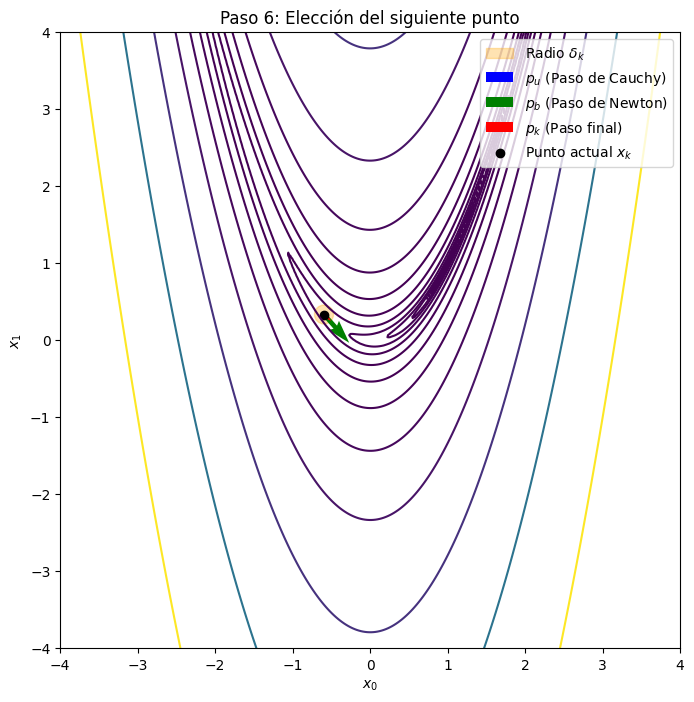

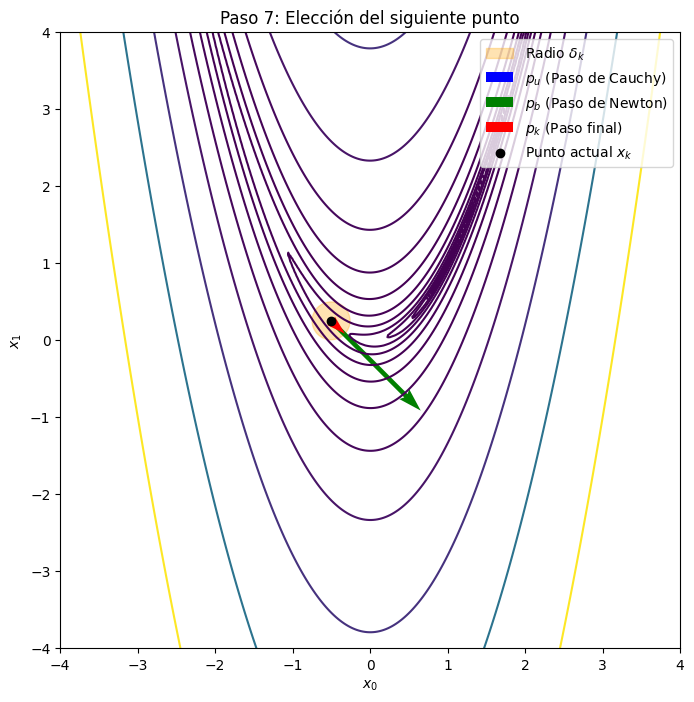

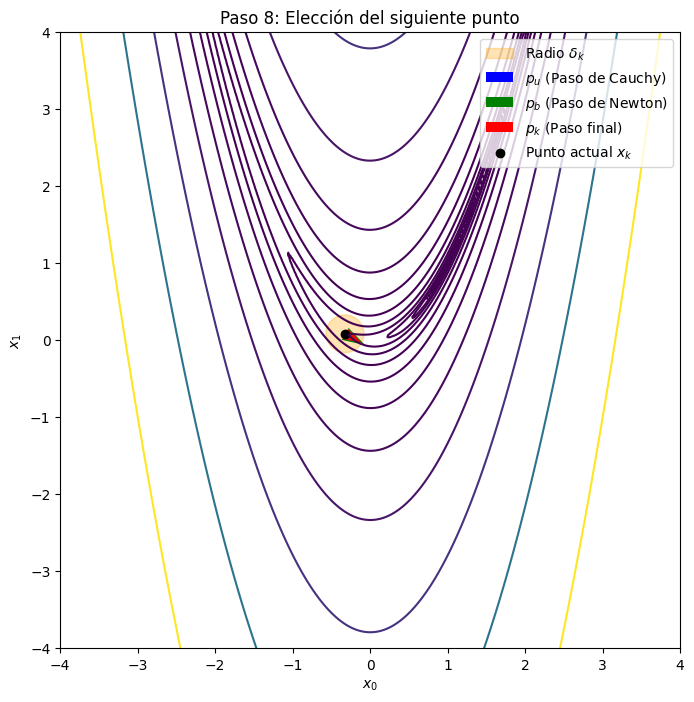

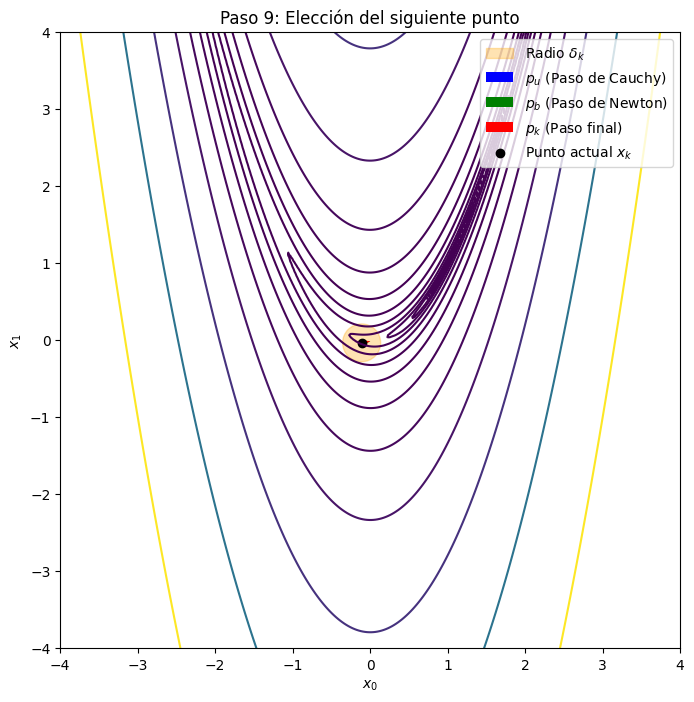

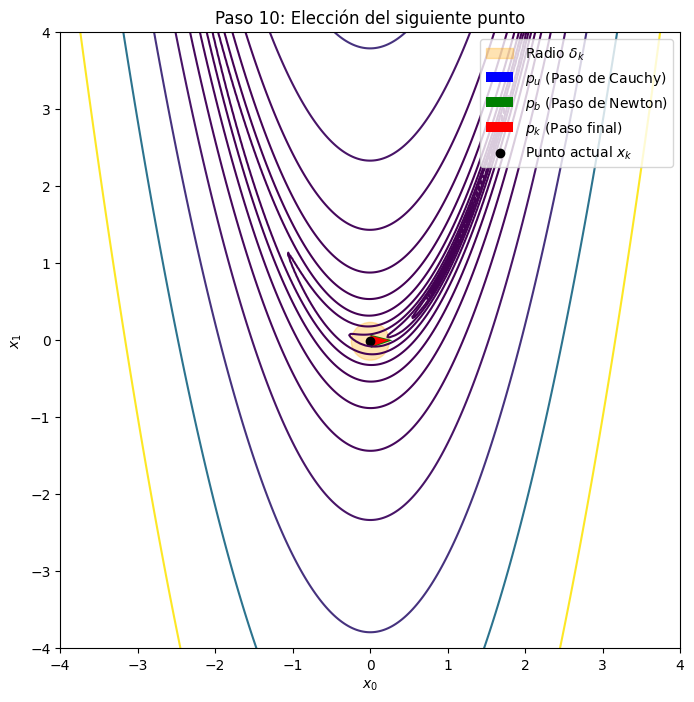

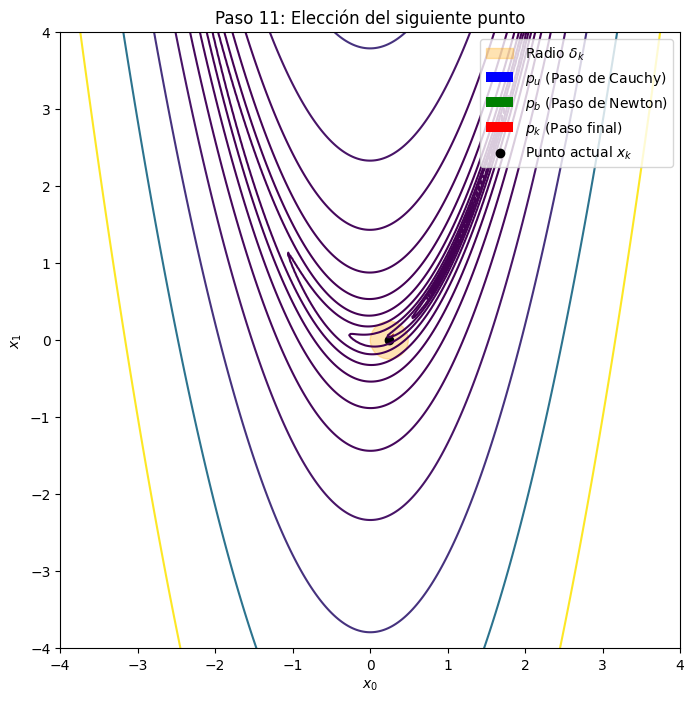

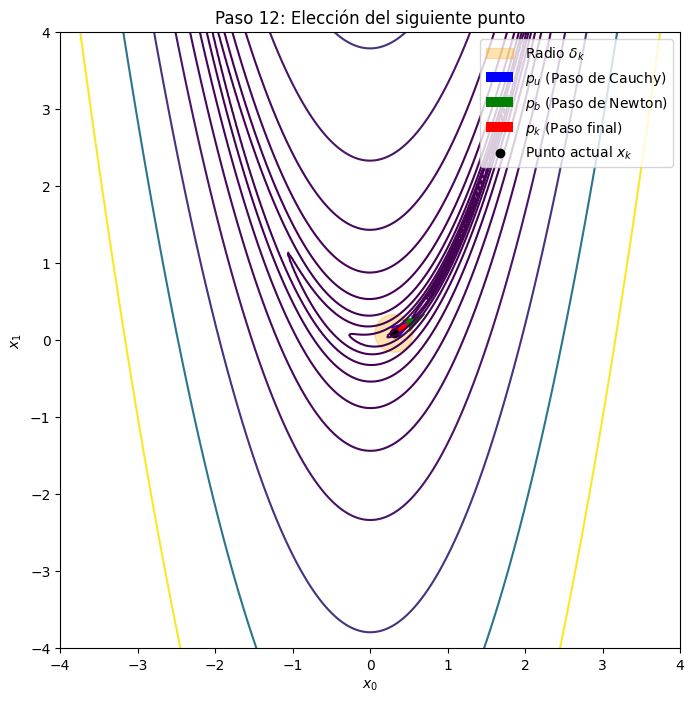

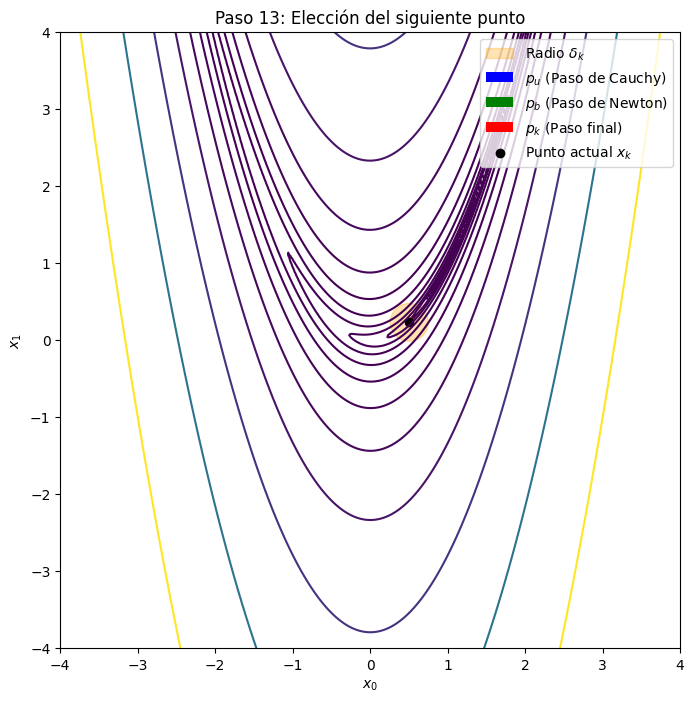

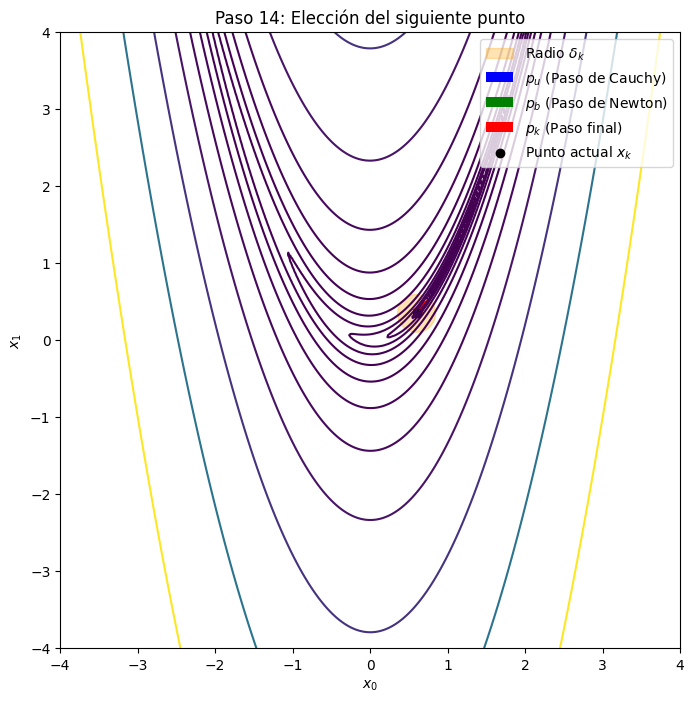

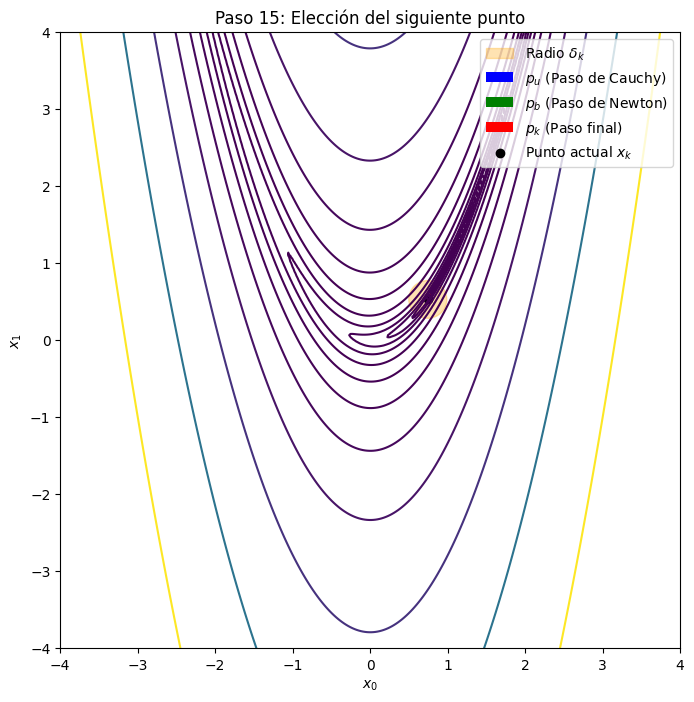

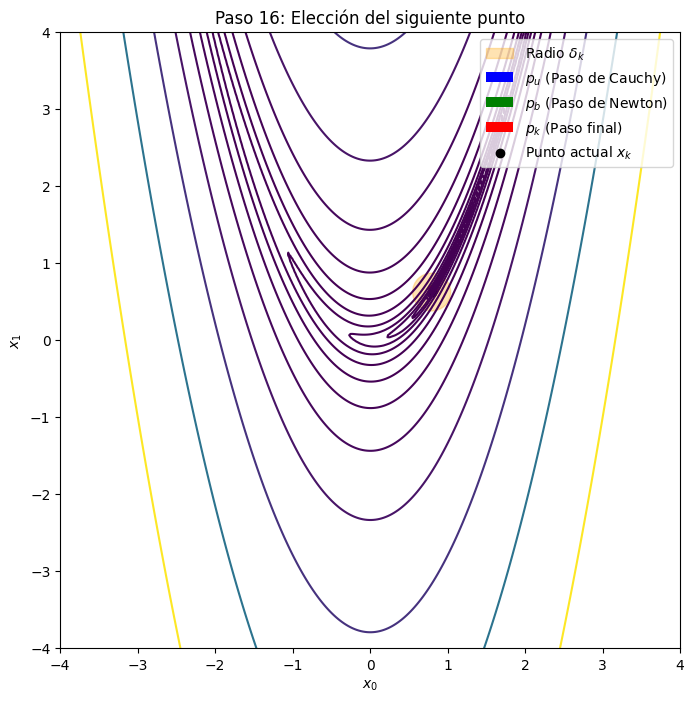

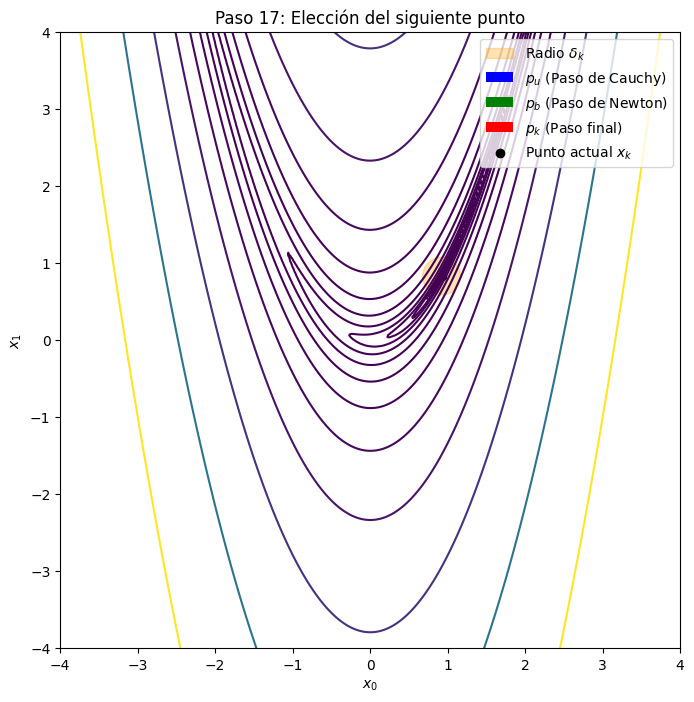

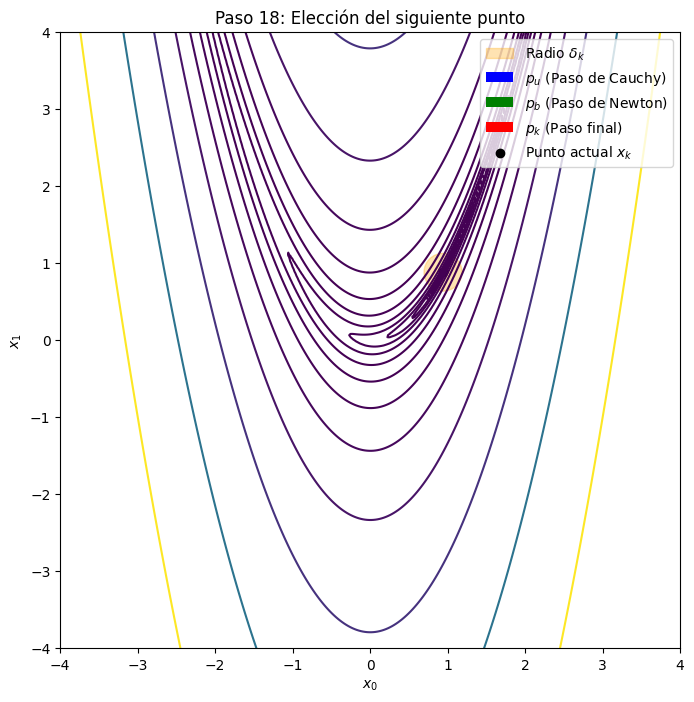

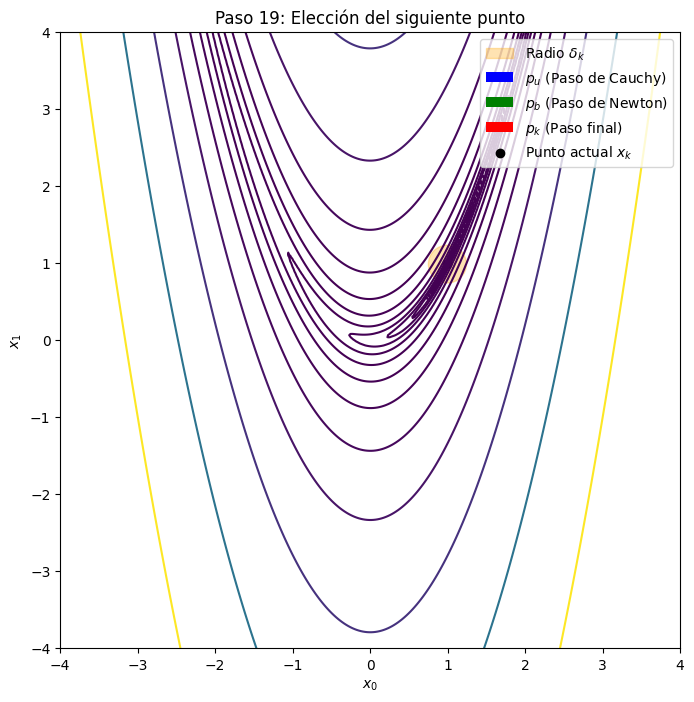

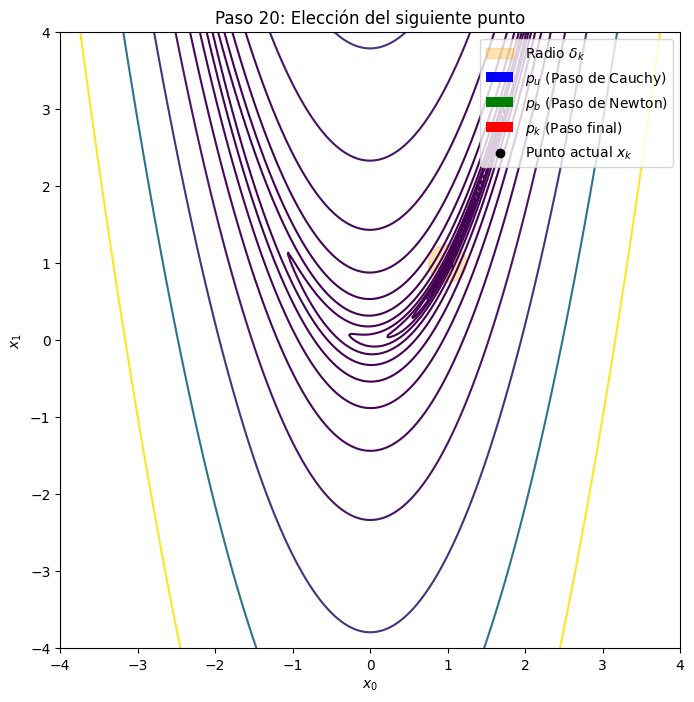

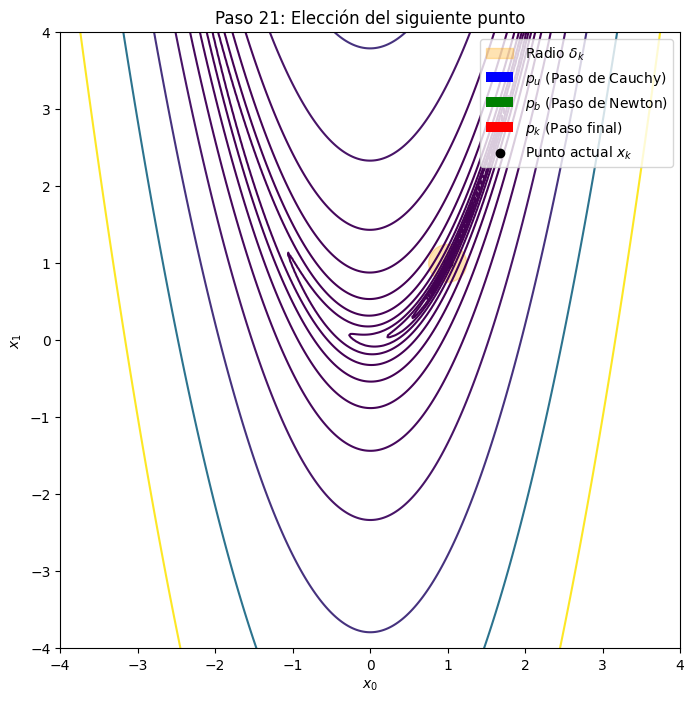

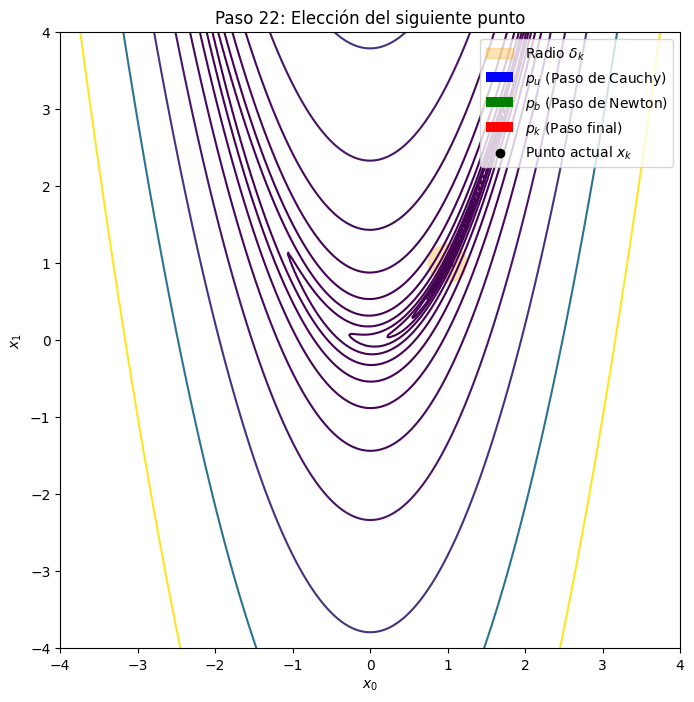

In [88]:
# Visualizar cada paso
for i in range(len(x_k)):
    visualize_dogleg_step(
        x_k=np.array(x_k[i]),
        delta_k=delta_k[i],
        p_u=np.array(p_u_list[i]),
        p_b=np.array(p_b_list[i]),
        p_k=np.array(p_k_list[i]),
        f=rosenbrock,
        step_index=i + 1
    )

In [93]:
def visualize_dogleg_path_2(x_k, delta_k, p_u, p_b, p_k, step_index):
    """
    Visualiza un paso individual del método Dogleg mostrando solo los vectores relevantes.
    
    Parameters:
    - x_k: Punto actual (array de 2 elementos).
    - delta_k: Radio de confianza en el paso actual.
    - p_u: Paso de Cauchy.
    - p_b: Paso de Newton.
    - p_k: Paso elegido.
    - step_index: Índice del paso actual.
    """
    fig, ax = plt.subplots(figsize=(8, 8))

    # Dibujar la región de confianza como un círculo
    trust_region = Circle(x_k, delta_k, color='orange', alpha=0.3, label="Radio $\delta_k$")
    ax.add_patch(trust_region)

    # Graficar los pasos
    ax.quiver(*x_k, *p_u, angles='xy', scale_units='xy', scale=1, color='blue', label="$p_u$ (Paso de Cauchy)", alpha=0.8)
    ax.quiver(*x_k, *p_b, angles='xy', scale_units='xy', scale=1, color='green', label="$p_b$ (Paso de Newton)", alpha=0.8)
    ax.quiver(*x_k, *p_k, angles='xy', scale_units='xy', scale=1, color='red', label="$p_k$ (Paso final)", alpha=0.8)



    # Punto actual
    ax.scatter(*x_k, color="black", label="Punto actual $x_k$", zorder=5)

    # Etiquetas y leyenda
    ax.set_title(f"Paso {step_index}: Elección del siguiente punto (Dogleg Path)")
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
    ax.legend()
    ax.set_xlim(x_k[0] - 2 * delta_k, x_k[0] + 2 * delta_k)
    ax.set_ylim(x_k[1] - 2 * delta_k, x_k[1] + 2 * delta_k)

    plt.grid()
    plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juanm\AppData\Local\Temp\ipykernel_32420\2419440601.py:16: SyntaxWarning: invalid escape sequence '\d'
  trust_region = Circle(x_k, delta_k, color='orange', alpha=0.3, label="Radio $\delta_k$")


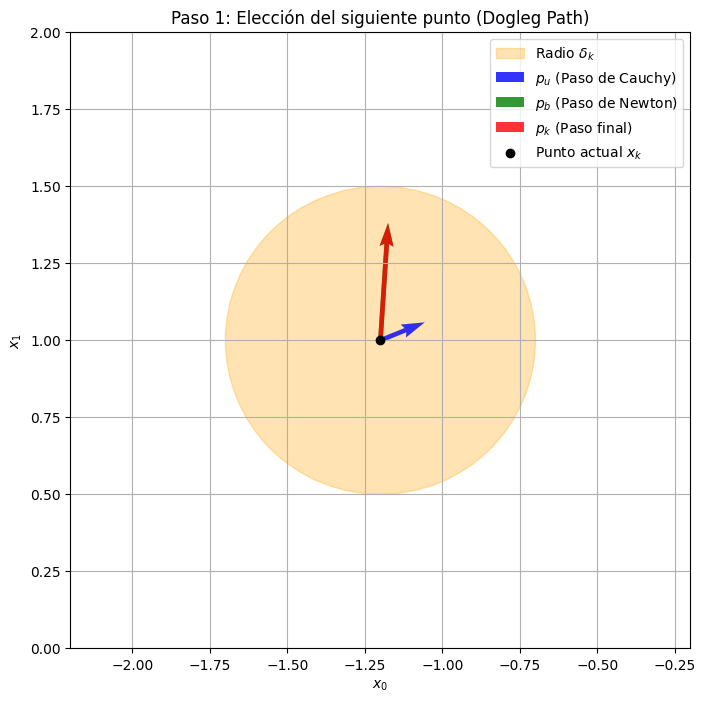

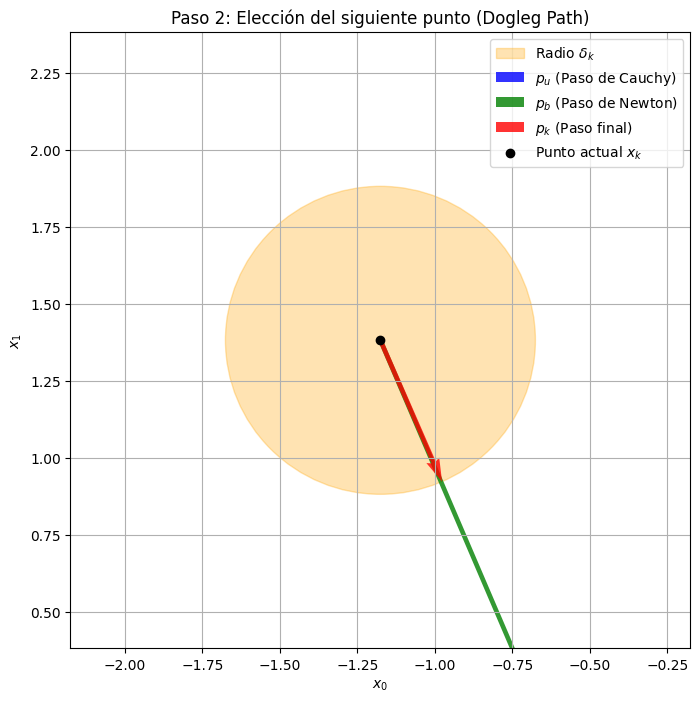

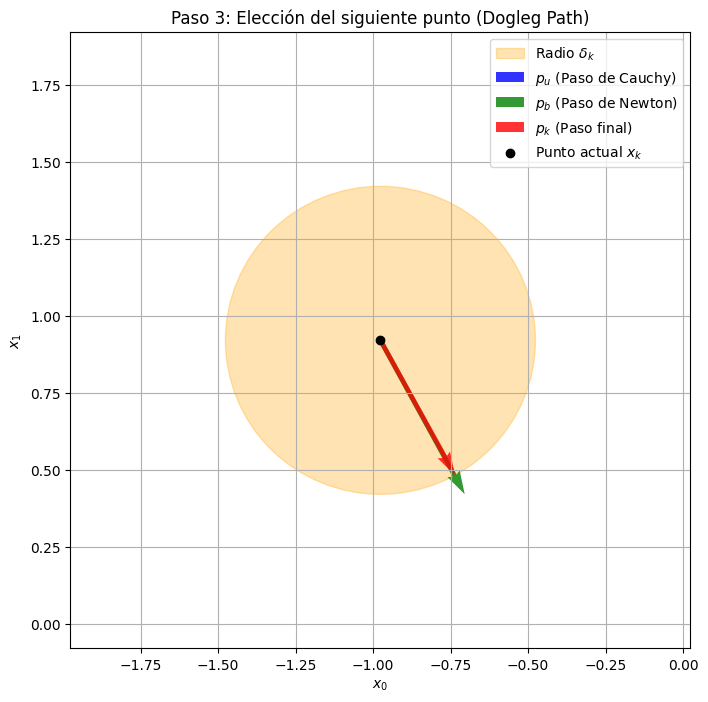

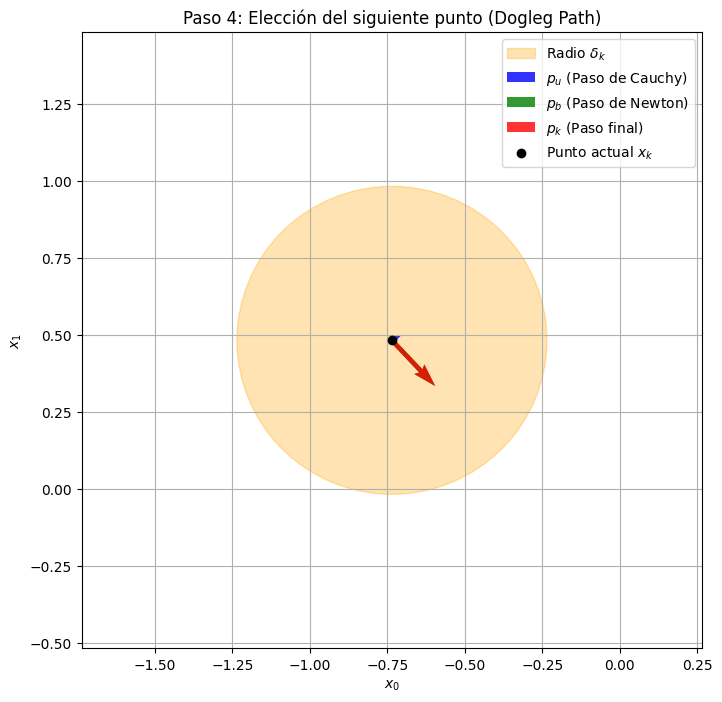

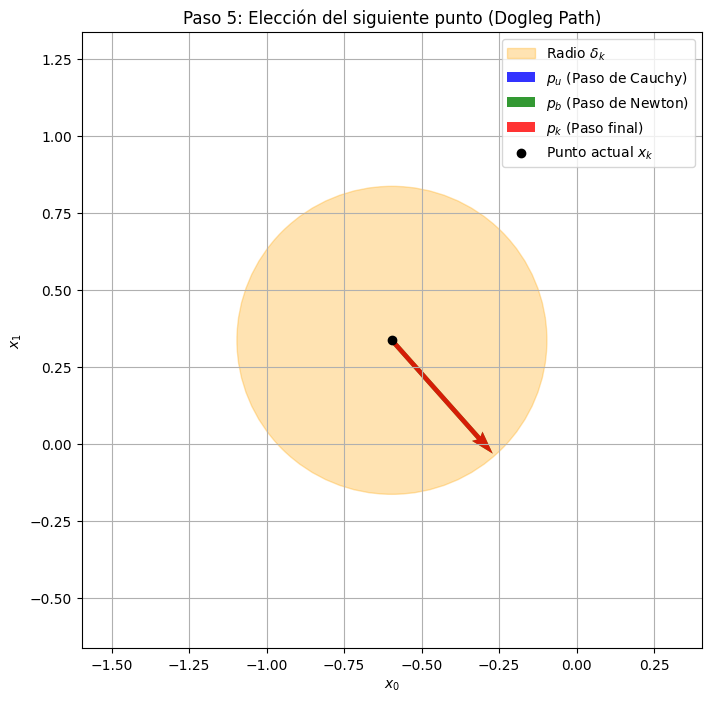

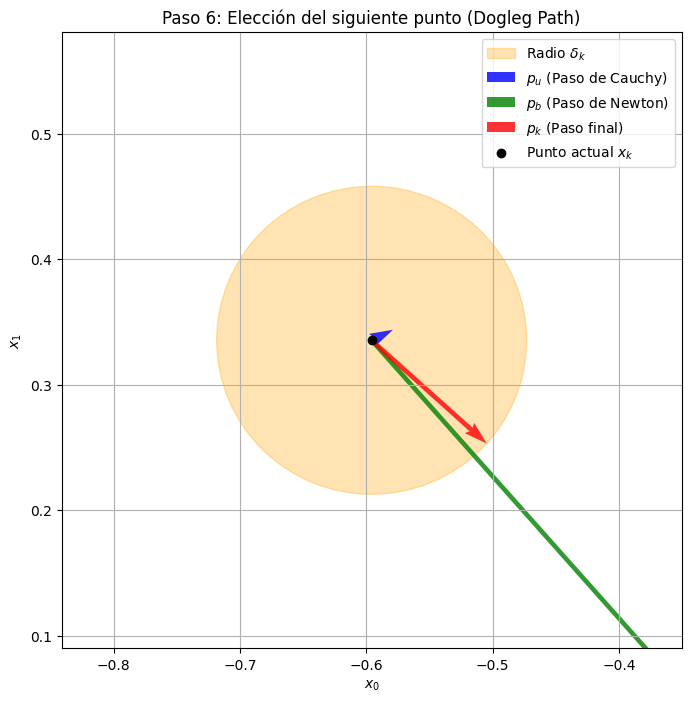

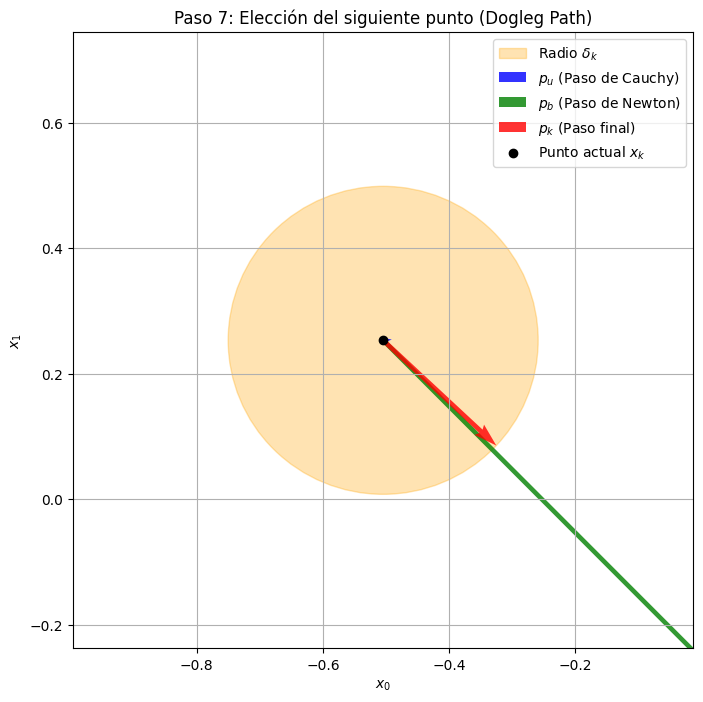

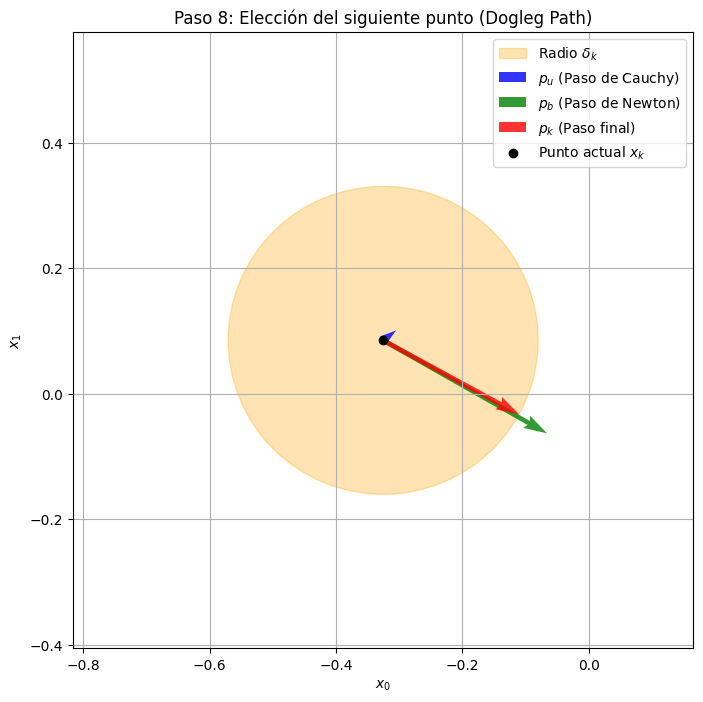

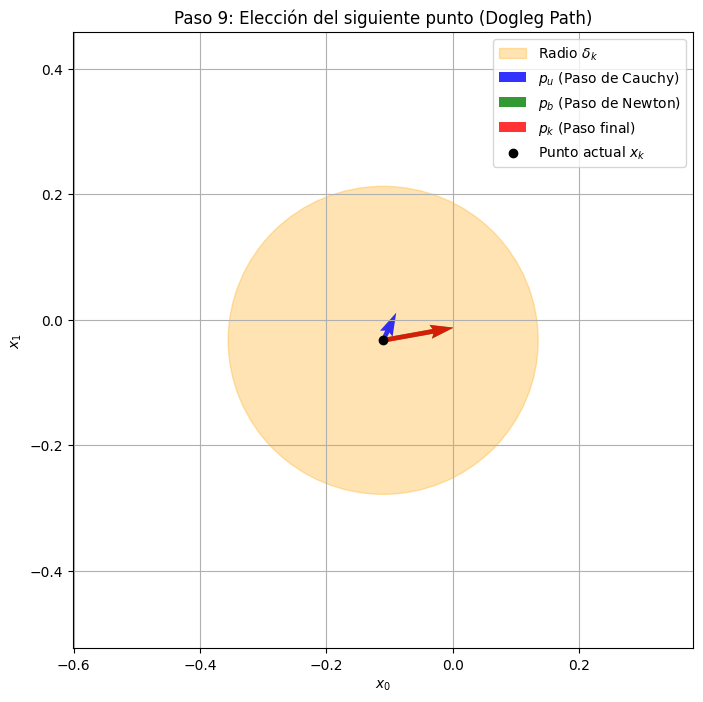

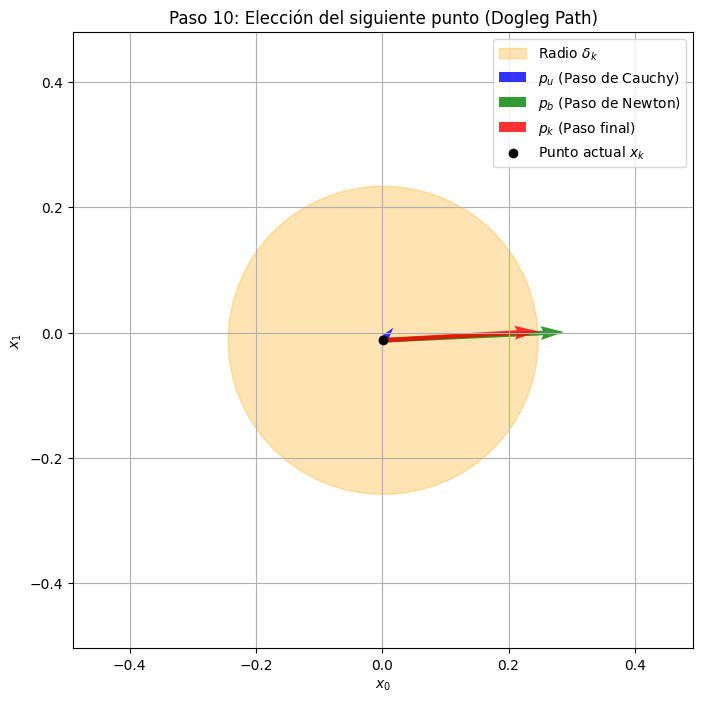

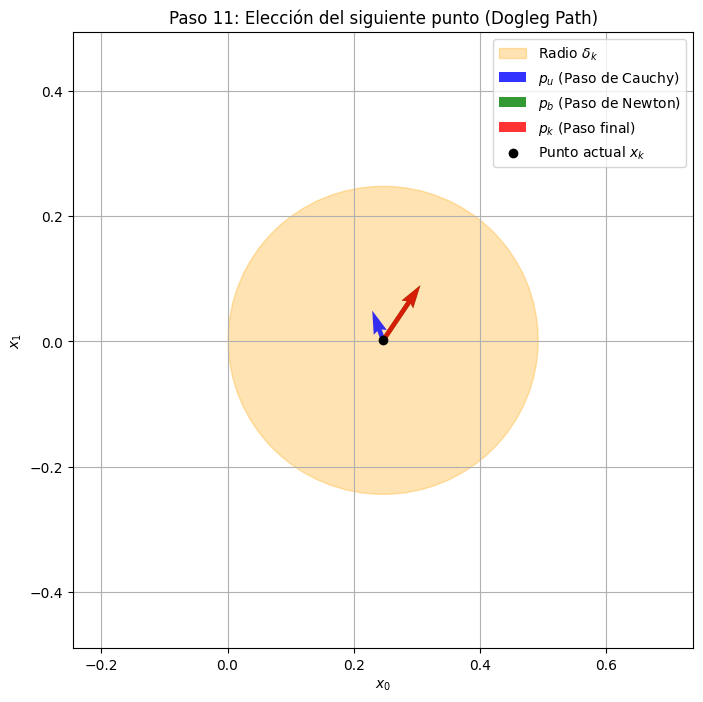

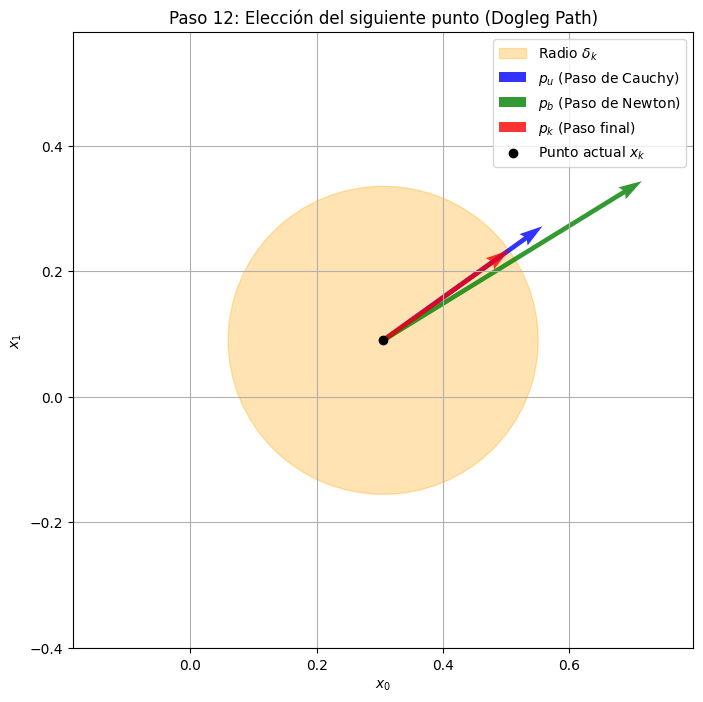

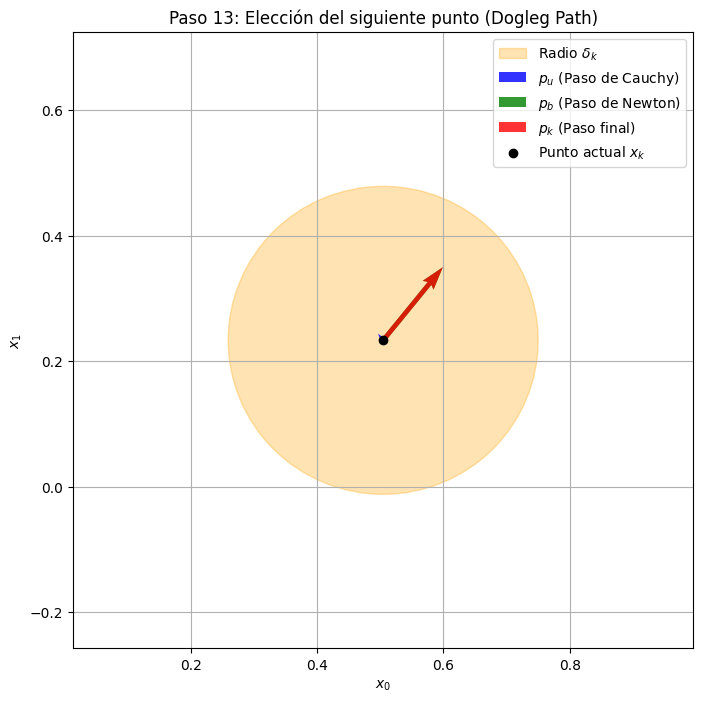

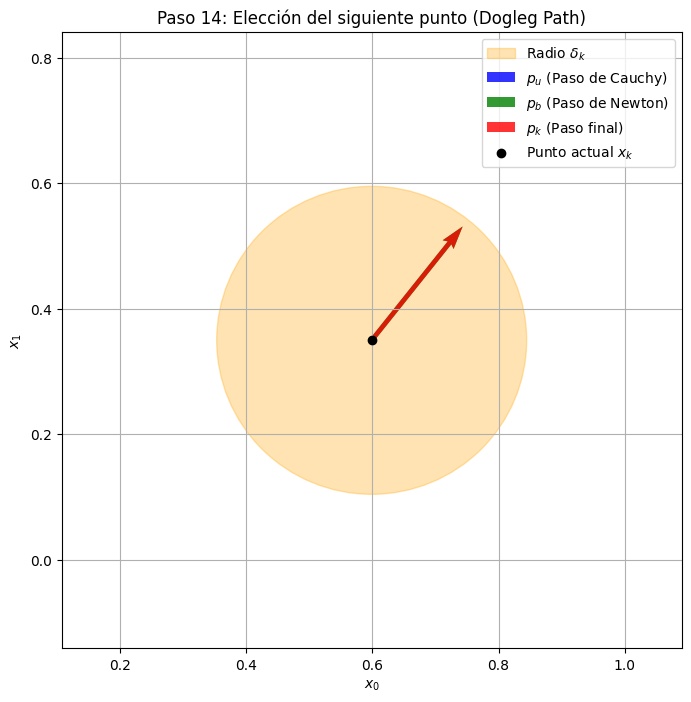

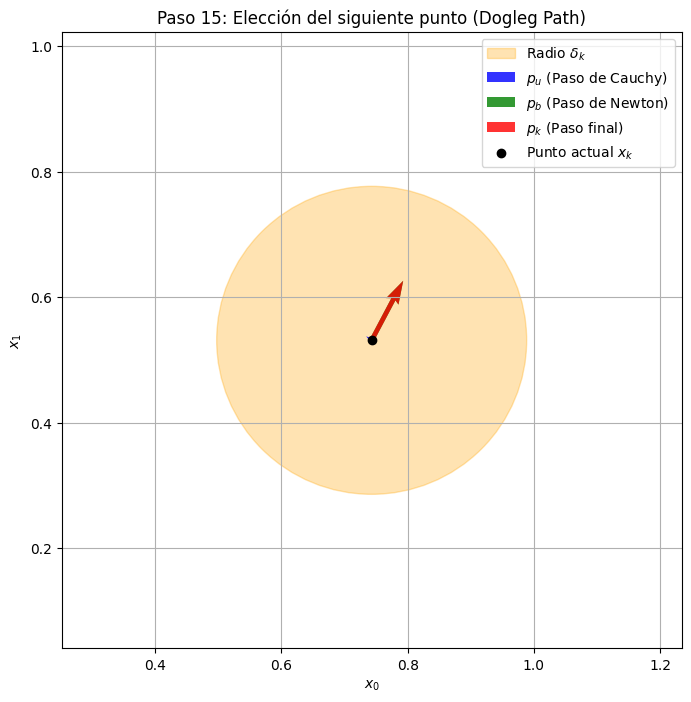

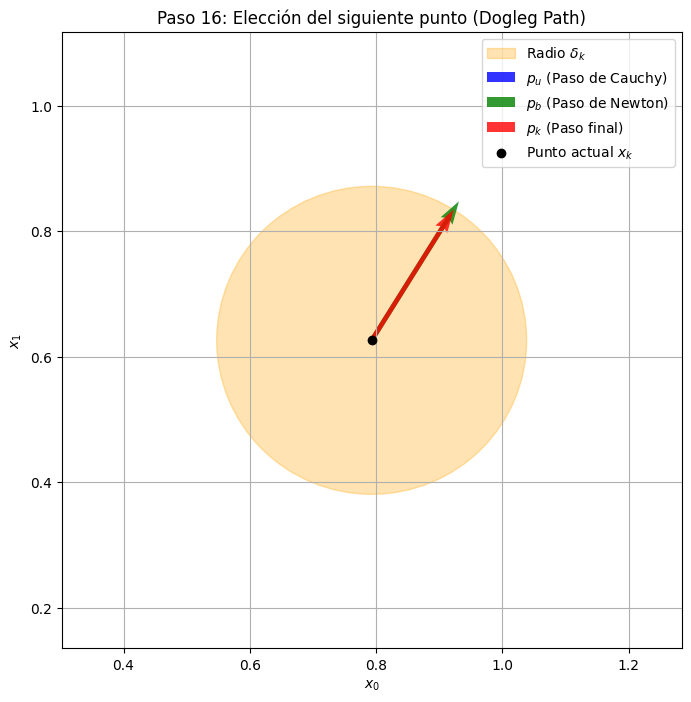

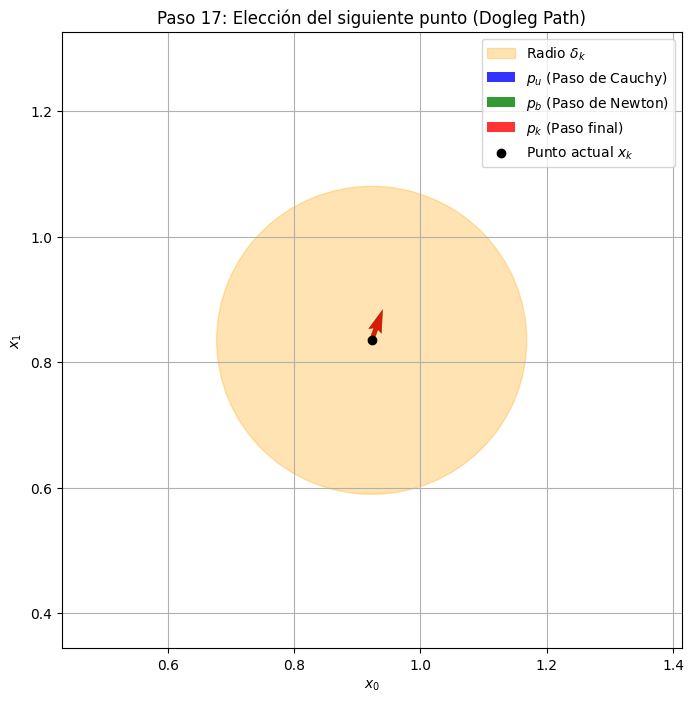

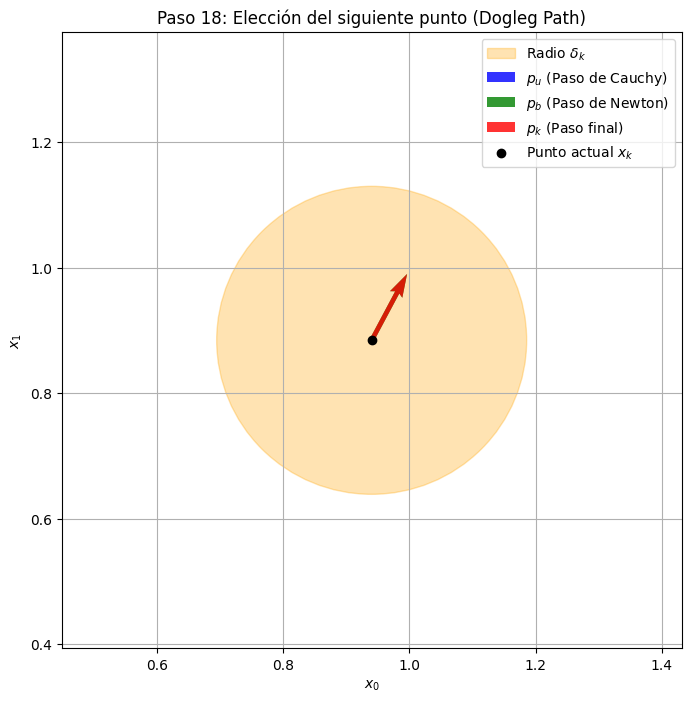

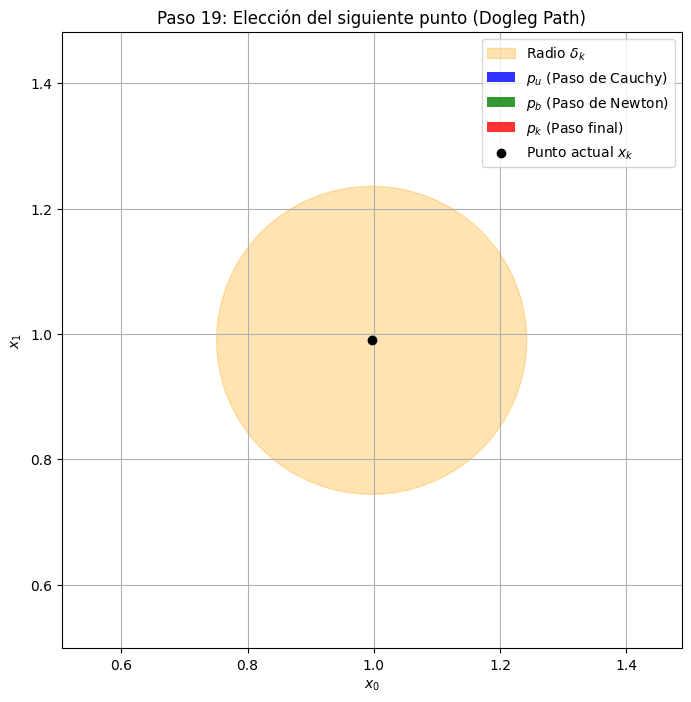

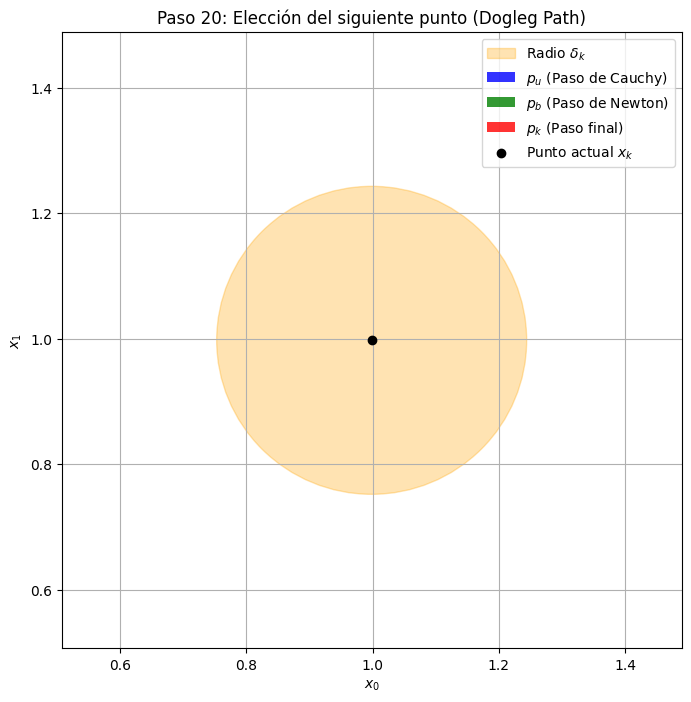

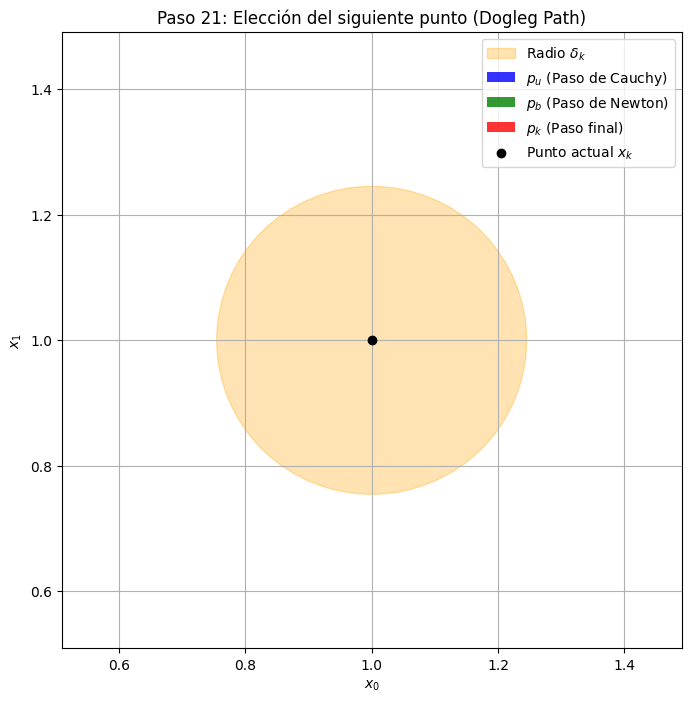

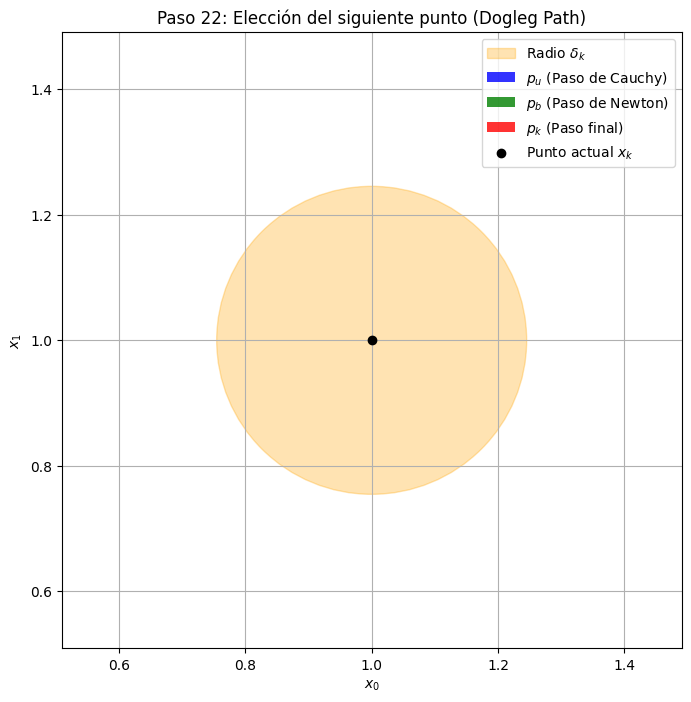

In [96]:
for i in range(len(x_k)):
    visualize_dogleg_path_2(
        x_k=np.array(x_k[i]),
        delta_k=delta_k[i],
        p_u=np.array(p_u_list[i]),
        p_b=np.array(p_b_list[i]),
        p_k=np.array(p_k_list[i]),
        step_index=i + 1
    )